# Behaviour and demographics

In [1]:
import sys
import numpy as np
sys.path.append("../code/")
subj_list = list(np.loadtxt('../code/subject_list_exclusions.txt', dtype='str'))

# Threat-safety task behaviour

In [2]:
from functions.data_helpers import get_reversal_behaviour, run_behav_stats
stat_df = run_behav_stats(get_reversal_behaviour(subj_list))
stat_df[stat_df.test == 'One sample'].head(4).round(7)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power,measure,contrast,test,pval_corr,sig_corr
T-test,-8.924796,89,two-sided,0.0,"[-1.17, -0.74]",0.940756,1.352e+11,1.0,arousal,safety_reversal,One sample,0.0,True
T-test,9.511949,89,two-sided,0.0,"[0.92, 1.41]",1.002647,2.046e+12,1.0,arousal,threat_reversal,One sample,0.0,True
T-test,6.391448,89,two-sided,0.0,"[0.58, 1.11]",0.673718,1.518e+06,1.0,valence,safety_reversal,One sample,0.0,True
T-test,-8.952509,89,two-sided,0.0,"[-1.59, -1.01]",0.943677,1.537e+11,1.0,valence,threat_reversal,One sample,0.0,True


In [3]:
stat_df[stat_df.test == 'Two sample'].head(4).round(2)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power,measure,contrast,test,pval_corr,sig_corr
T-test,-0.21,88,two-sided,0.84,"[-0.47, 0.38]",0.04,0.225,0.05,arousal,safety_reversal,Two sample,1.00,False
T-test,-0.81,88,two-sided,0.42,"[-0.69, 0.29]",0.17,0.295,0.13,arousal,threat_reversal,Two sample,1.00,False
T-test,1.52,88,two-sided,0.13,"[-0.12, 0.92]",0.32,0.611,0.33,valence,safety_reversal,Two sample,0.36,False
T-test,0.23,88,two-sided,0.82,"[-0.51, 0.65]",0.05,0.226,0.06,valence,threat_reversal,Two sample,1.00,False


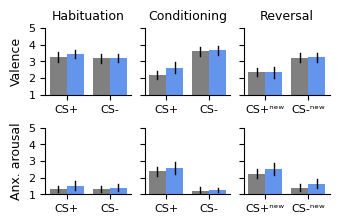

In [4]:
# draw a nice plot
import seaborn as sns
import matplotlib.pyplot as plt
from functions.data_helpers import get_task_beh_data

def behav_plot(task_df, palette=['gray', 'cornflowerblue'], save=None):

    # set global plot properties
    fig, axs = plt.subplot_mosaic("""
                                AABBCC
                                DDEEFF
                                """, figsize=(3.27, 2.13), constrained_layout=True)
    plt.rc('axes', labelsize=9)
    plt.rcParams['svg.fonttype'] = 'none'
    ax_list = ['A', 'B', 'C', 'D', 'E', 'F']

    c = 0  # counting variable
    for rating in ['valence', 'arousal']:
        for phase in ['habituation', 'conditioning', 'reversal']:
            # extract appropriate data from task df
            tmp_df = task_df.loc[(task_df.rating_measure == rating) & (
                task_df.phase == phase)].copy()

            #start plotting
            g = sns.barplot(data=tmp_df, x='trial_type', y='rating', hue='group',
                            palette=palette, ax=axs[ax_list[c]], order=['CS+', 'CS-'],
                            saturation=1, errcolor='k', errwidth=1)

            g.set(ylim=(1, 5))  # all ratings should be visible
            sns.despine()
            g.set(xlabel='')

            # change the fontsize
            g.set_yticks(range(1, 6))
            g.set_yticklabels(range(1, 6), fontsize=8)
            g.set_xticks(range(0, 2))
            g.set_xticklabels(['CS+', 'CS-'], fontsize=8)

            # y axis details
            if c == 0:
                g.set_ylabel('Valence', size=9)
            elif c == 3:
                g.set_ylabel('Anx. arousal', size=9)
            else:
                g.set(ylabel='')  # remove y info
                g.set(yticklabels=[])

            # x axis details
            if c == 0:
                g.set_title('Habituation', fontdict={'fontsize': 9})
            elif c == 1:
                g.set_title('Conditioning', fontdict={'fontsize': 9})
            elif c == 2:
                g.set_title('Reversal', fontdict={'fontsize': 9})
            
            if c == 2 or c == 5:
                g.set_xticklabels(['CS+ⁿᵉʷ', 'CS-ⁿᵉʷ'], fontsize=8)
            g.get_legend().remove()
            c = c+1
    if save is not None:
        plt.savefig(save, dpi=300, pad_inches=0.2)
    plt.show()


behav_plot(get_task_beh_data(subj_list, ratings_only=True), save='../figures/task_ratings.svg')

## Contingency awareness
OCD patients are worse at being aware of the conditioning

In [5]:
import pingouin as pg
from functions.data_helpers import get_phenotype, get_awareness_labels

df = get_phenotype(subj_list, ['participants'])
df['group-awareness'] = get_awareness_labels(subj_list)

print('Conditioning manipulation stats:')
display(df.groupby('group')['group-awareness'].value_counts())
expected, observed, stats = pg.chi2_independence(data=df,
                                                 x='group-awareness',
                                                 y='group')
display(stats.round(3))

Conditioning manipulation stats:


group    group-awareness
control  control-aware      45
patient  patient-aware      30
         patient-unaware    15
Name: group-awareness, dtype: int64

/home/lukeh/miniconda3/envs/py39/lib/python3.9/site-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn('Low count on {} frequencies.'.format(name))
/home/lukeh/miniconda3/envs/py39/lib/python3.9/site-packages/scipy/stats/stats.py:6716: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/home/lukeh/miniconda3/envs/py39/lib/python3.9/site-packages/scipy/stats/stats.py:6716: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/home/lukeh/miniconda3/envs/py39/lib/python3.9/site-packages/scipy/stats/stats.py:6713: RuntimeWarning: divide by zero encountered in true_divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)


,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000,90.000,2.0,0.0,1.000,1.0
1,cressie-read,0.667,95.159,2.0,0.0,1.028,1.0
2,log-likelihood,0.000,124.766,2.0,0.0,1.177,1.0
3,freeman-tukey,-0.500,NaN,2.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.000,inf,2.0,0.0,inf,1.0
5,neyman,-2.000,NaN,2.0,NaN,NaN,NaN


### Does this covary with subjective task ratings?
Yes.

In [6]:
from functions.data_helpers import get_reversal_behaviour
df = get_reversal_behaviour(subj_list)
df['group-awareness'] = get_awareness_labels(subj_list)

import pingouin as pg
import pandas as pd

# run behaviour stats with three groups...
#def run_awareness_stats(df):
stat_df = pd.DataFrame()
for measure in ['arousal', 'valence']:
    for contrast in ['safety_reversal', 'threat_reversal']:

        # ANOVA
        tmp = pg.anova(data=df, dv=measure+'_'+contrast, between='group-awareness')
        tmp['measure'] = measure
        tmp['contrast'] = contrast
        tmp['test'] = 'ANOVA'
        stat_df = pd.concat([stat_df, tmp])

        if tmp['p-unc'][0] < 0.05:  # perform follow up t-tests
            ttest_df = pd.DataFrame()
            for g1, g2 in zip(['control-aware', 'control-aware', 'patient-aware'],
                              ['patient-aware', 'patient-unaware', 'patient-unaware']):

                tmp = pg.ttest(df.loc[df['group-awareness'] == g1, measure+'_'+contrast],
                            df.loc[df['group-awareness'] == g2, measure+'_'+contrast])
                tmp['measure'] = measure
                tmp['contrast'] = contrast
                tmp['test'] = 't-test:'+g1+' v.'+g2
                ttest_df = pd.concat([ttest_df, tmp])

            # multiple comparison correction
            # compute these for the t-tests
            h1, pval_corr = pg.multicomp(ttest_df['p-val'].values, alpha=0.05, method='fdr_by')
            ttest_df['pval_corr'] = np.real(pval_corr)
            ttest_df['sig_corr'] = h1
            stat_df = pd.concat([stat_df, ttest_df])
stat_df.to_csv('../results/awareness_behaviour_stat.csv', index=False)
stat_df.head(20)

,Source,ddof1,ddof2,F,p-unc,np2,measure,contrast,test,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power,pval_corr,sig_corr
0,group-awareness,2.0,87.0,5.342935,0.006477,0.109390,arousal,safety_reversal,ANOVA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T-test,NaN,NaN,NaN,NaN,NaN,NaN,arousal,safety_reversal,t-test:control-aware v.patient-aware,1.096799,47.118284,two-sided,0.278303,"[-0.24, 0.82]",0.277976,0.407,0.213882,0.510223,False
T-test,NaN,NaN,NaN,NaN,NaN,NaN,arousal,safety_reversal,t-test:control-aware v.patient-unaware,-4.063578,46.331754,two-sided,0.000185,"[-1.06, -0.36]",0.903727,152.236,0.846296,0.001018,True
T-test,NaN,NaN,NaN,NaN,NaN,NaN,arousal,safety_reversal,t-test:patient-aware v.patient-unaware,-3.872348,40.511968,two-sided,0.000385,"[-1.52, -0.48]",0.938695,71.611,0.826790,0.001058,True
0,group-awareness,2.0,87.0,6.326521,0.002721,0.126971,arousal,threat_reversal,ANOVA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T-test,NaN,NaN,NaN,NaN,NaN,NaN,arousal,threat_reversal,t-test:control-aware v.patient-aware,-2.331354,65.168547,two-sided,0.022838,"[-1.11, -0.09]",0.541978,2.405,0.621400,0.062804,False
T-test,NaN,NaN,NaN,NaN,NaN,NaN,arousal,threat_reversal,t-test:control-aware v.patient-unaware,1.864042,25.580360,two-sided,0.073832,"[-0.06, 1.26]",0.536533,1.18,0.424677,0.135359,False
T-test,NaN,NaN,NaN,NaN,NaN,NaN,arousal,threat_reversal,t-test:patient-aware v.patient-unaware,3.578209,28.137332,two-sided,0.001279,"[0.51, 1.89]",1.131079,34.46,0.937713,0.007035,True
0,group-awareness,2.0,87.0,3.163030,0.047202,0.067784,valence,safety_reversal,ANOVA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T-test,NaN,NaN,NaN,NaN,NaN,NaN,valence,safety_reversal,t-test:control-aware v.patient-aware,0.471469,58.072478,two-sided,0.639072,"[-0.47, 0.76]",0.113318,0.267,0.076164,1.000000,False


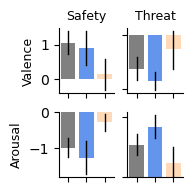

In [7]:
fig, axs = plt.subplot_mosaic("""
                            AB
                            CD
                            """, figsize=(1.8, 1.8), constrained_layout=True)
plt.rc('axes', labelsize=9)
plt.rcParams['svg.fonttype'] = 'none'
ax_list = ['A', 'B', 'C', 'D']

c = 0  # counting variable
for rating in ['valence', 'arousal']:
    for phase in ['safety_reversal', 'threat_reversal']:

        #start plotting
        g = sns.barplot(data=df, x='group-awareness', y=rating+'_'+phase, hue='group-awareness',
                        palette=['gray', 'cornflowerblue', 'peachpuff'], ax=axs[ax_list[c]], 
                        order=['control-aware', 'patient-aware','patient-unaware'],
                        saturation=1, errcolor='k', errwidth=1, dodge=False)

        #g.set(ylim=(1, 5))  # all ratings should be visible
        sns.despine()
        g.set(xlabel='')

        # change the fontsize
        #g.set_yticks(range(1, 6))
        #g.set_yticklabels(range(1, 6), fontsize=8)
        g.set_xticks(range(0, 3))
        g.set_xticklabels(['', '',''], fontsize=8)

        # y axis details
        if c == 0:
            g.set_ylabel('Valence', size=9)
        elif c == 2:
            g.set_ylabel('Arousal', size=9)
        else:
            g.set(ylabel='')  # remove y info
            g.set(yticklabels=[])

        # x axis details
        if c == 0:
            g.set_title('Safety', fontdict={'fontsize': 9})
        elif c == 1:
            g.set_title('Threat', fontdict={'fontsize': 9})

        g.get_legend().remove()
        c = c+1

plt.savefig('../figures/task_ratings_awareness_stats.svg', dpi=300, pad_inches=0.2)
plt.show()

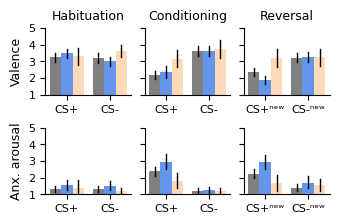

In [8]:
# draw a plot
# get data
task_df = get_task_beh_data(subj_list, ratings_only=True)
df = get_phenotype(subj_list, ['participants'])
df['group-awareness'] = get_awareness_labels(subj_list)

task_df.group = np.nan
for subj in task_df.participant_id.unique():
    new_group = df.loc[df.participant_id == subj, 'group-awareness'].values[0]
    task_df.loc[task_df.participant_id == subj, 'group'] = new_group
    
behav_plot(task_df, palette=['gray', 'cornflowerblue', 'peachpuff'], save='../figures/task_ratings_awareness.svg')

### Is there any relationship with OCD severity (Y-BOCS total)?
No.

In [20]:
df = get_phenotype(subj_list, ['participants', 'ybocs'])
df['group-awareness'] = get_awareness_labels(subj_list)

a = df[df['group-awareness'] == 'patient-aware'].ybocs_total.values
b = df[df['group-awareness'] == 'patient-unaware'].ybocs_total.values

print(pg.ttest(a,b))

               T        dof alternative     p-val          CI95%   cohen-d  \
T-test -0.118369  26.128987   two-sided  0.906681  [-3.67, 3.27]  0.038493   

         BF10     power  
T-test  0.311  0.051625  


### Is there any relationship with noise aversiveness?
No.

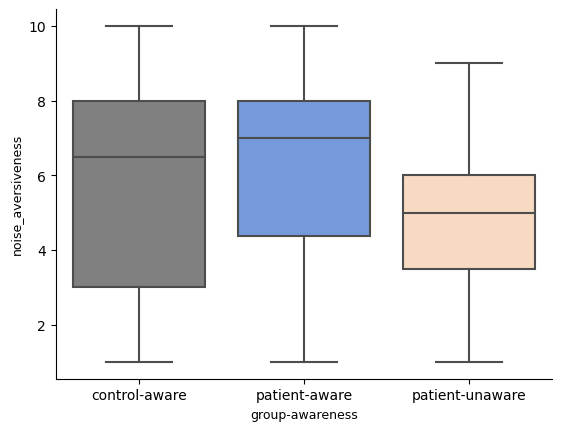

,Source,ddof1,ddof2,F,p-unc,np2
0,group-awareness,2,84,1.255133,0.290328,0.029017


In [10]:
df = get_phenotype(subj_list, ['participants', 'post_scan'])
df['group-awareness'] = get_awareness_labels(subj_list)

sns.boxplot(data=df, x='group-awareness', y='noise_aversiveness', palette=['gray', 'cornflowerblue', 'peachpuff'])
sns.despine()
plt.show()

pg.anova(data=df, dv='noise_aversiveness', between='group-awareness')

# Demographics and other details

In [11]:
# generated by behaviour/demographic_table.py
display(pd.read_csv('../results/demographics.csv'))

,_,Control (N=45),OCD (N=45),p
0,Age,32.51 (8.72),29.96 (7.63),0.140
1,Gender (\% Male),40.0,46.67,0.671
2,Handedness (\% Right),95.56,84.44,0.160
3,IQ (WASI),112.71 (11.3),107.24 (12.69),0.030
4,YBOCS,1.78 (3.02),25.13 (5.14),0.000
5,\quad Obsessions,1.22 (2.31),13.76 (4.33),0.000
6,\quad Compulsions,0.56 (1.65),13.22 (2.64),0.000
7,OBQ,116.56 (47.13),194.2 (53.92),0.000
8,OCIR,5.56 (7.14),33.07 (14.49),0.000
9,HADS: anxiety,4.71 (3.68),13.27 (4.72),0.000


## Time between sessions

In [12]:
# this is calculated in the code/behaviour/time_between_sessions.py